In [1]:
from astropy.io import fits
from sklearn.cluster import DBSCAN
import numpy as np

import matplotlib
matplotlib.rc('xtick', labelsize=14)
matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('axes', labelsize=18)
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
def plot_outliers(fname, fold=None):
    #Obtenemos los datos
    data = fits.getdata(fname)
    cenx  = data['CEN_X']
    ceny  = data['CEN_Y']
    flux  = data['GP_FLUX']
    cadn  = data['CADENCENO']
    time  = data['TIME']
    
    #El telescopio rota, por tanto el desplazamiento angular tiene una escala
    #similar para todos los targets. Si trabajamos con los centroides, mientras
    #más lejos del pointing, más se moverán
    #Una opción es calcular el ángulo o bien estimar la escala de movimiento (Existe una mejor forma?)
    dist  = np.sqrt(np.diff(cenx)**2 + np.diff(ceny)**2)
    scale = np.nanmedian(dist)
    print scale
    
    #Usamos DBSCAN para encontrar clusters en los datos
    #min_samples=3 puede parecer poco, pero no nos interesa
    #encontrar *un* cluster con todos los inliers, sino identificar
    #datos que no pertenezcan a ningun cluster (outliers!)
    X  = np.transpose([cenx, ceny])
    db = DBSCAN(eps=scale, min_samples=3).fit(X)
    
    #-1 outliers, mayor o igual a 0 inliers
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    unique_labels = np.unique(labels)
    print unique_labels
    
    #Graficamos los centroides vs tiempo (numero de cadencia)
    #Y los centroides coloreados segun clusters encontrados
    #Los outliers en la fotometría vienen dados por imágenes
    #con alguna anomalía, que por lo general se identifica
    #por una estrella fuera del centro o de la imagen,
    #generando los outliers en los centroides
    fig, ax = plt.subplots(ncols=2, figsize=[8,4])
    ax[0].scatter(cenx, ceny, c=cadn)
    ax[0].autoscale()
    for a in ax:
        a.set_xlabel('X')
        a.set_ylabel('Y')


    for u in unique_labels:
        ma = labels == u
        ax[1].scatter(cenx[ma], ceny[ma])
        
    fig.tight_layout()
        
    #Vemos los resultados ahora en las curvas de luz
    #Y en el comportamiento de los centroides en el tiempo
    #En K2 estos ultimos describen una forma tipo sierra
    
    #Notamos tambien que las cadencias defectuosas son similares
    #Entre un caso u otro, lo que motiva para poder generar
    #un listado de estas cadencias y removerlas en todos los targets
    #en vez de realizar el procedimiento de busqueda de outliers en cada una
    fig, ax = plt.subplots(figsize=[12,9], nrows=3, sharex=True, dpi=300)
    
    for u in unique_labels:
        ma = labels == u  
    
        chk  = u != -1
        odot = '.k' if chk else 'xr'
        zord = 1 if chk else 2
        mss  = 2 if chk else 10

        ax[0].plot(cadn[ma], flux[ma], odot, zorder=zord, ms=mss)
        ax[1].plot(cadn[ma], cenx[ma], odot, zorder=zord, ms=mss)
        ax[2].plot(cadn[ma], ceny[ma], odot, zorder=zord, ms=mss)
        
        ax[0].set_ylabel('Flux')
        ax[1].set_ylabel('X')
        ax[2].set_ylabel('Y')
        ax[2].set_xlabel('Cadence No.')
        
        if not chk: print cadn[ma]
    fig.subplots_adjust(hspace=0)

        


0.00370287
[-1  0  1  2  3]
[136855 136865 136948 137044 137140 137236 137332 137428 137524 137620
 137716 137812 137908 138004 138098 138099 138100 138196 138291 138292
 138388 138580 138676 138772 138868 138964 139060 139542 139637 139638
 139734 139830 139926 140022 140118 140214 140310 140502 140598 140670
 140671 140672 140673 140674 140675 140676 140677 140678 140679 140680
 140681 140682 140693]


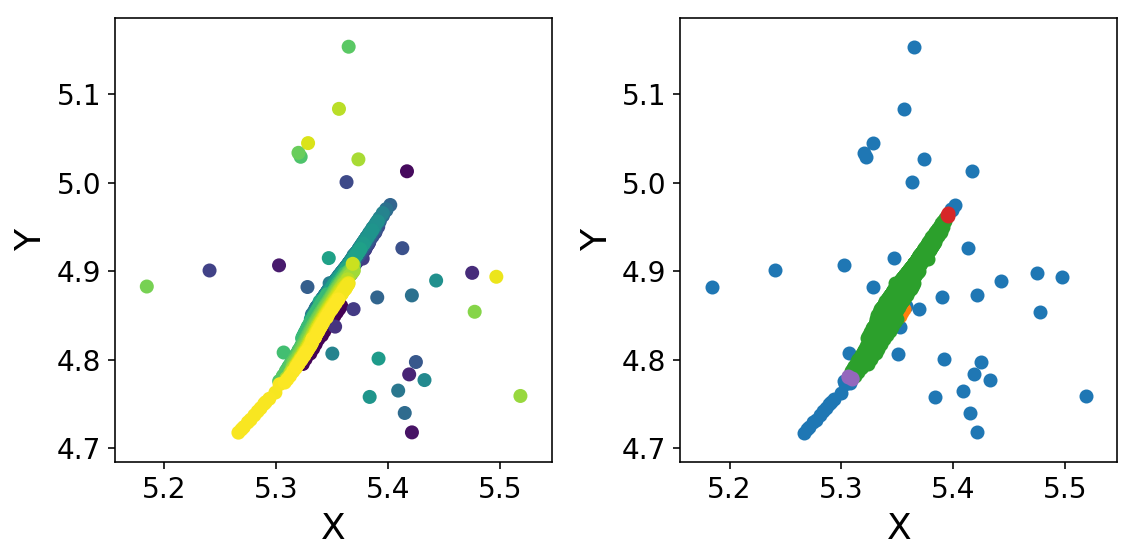

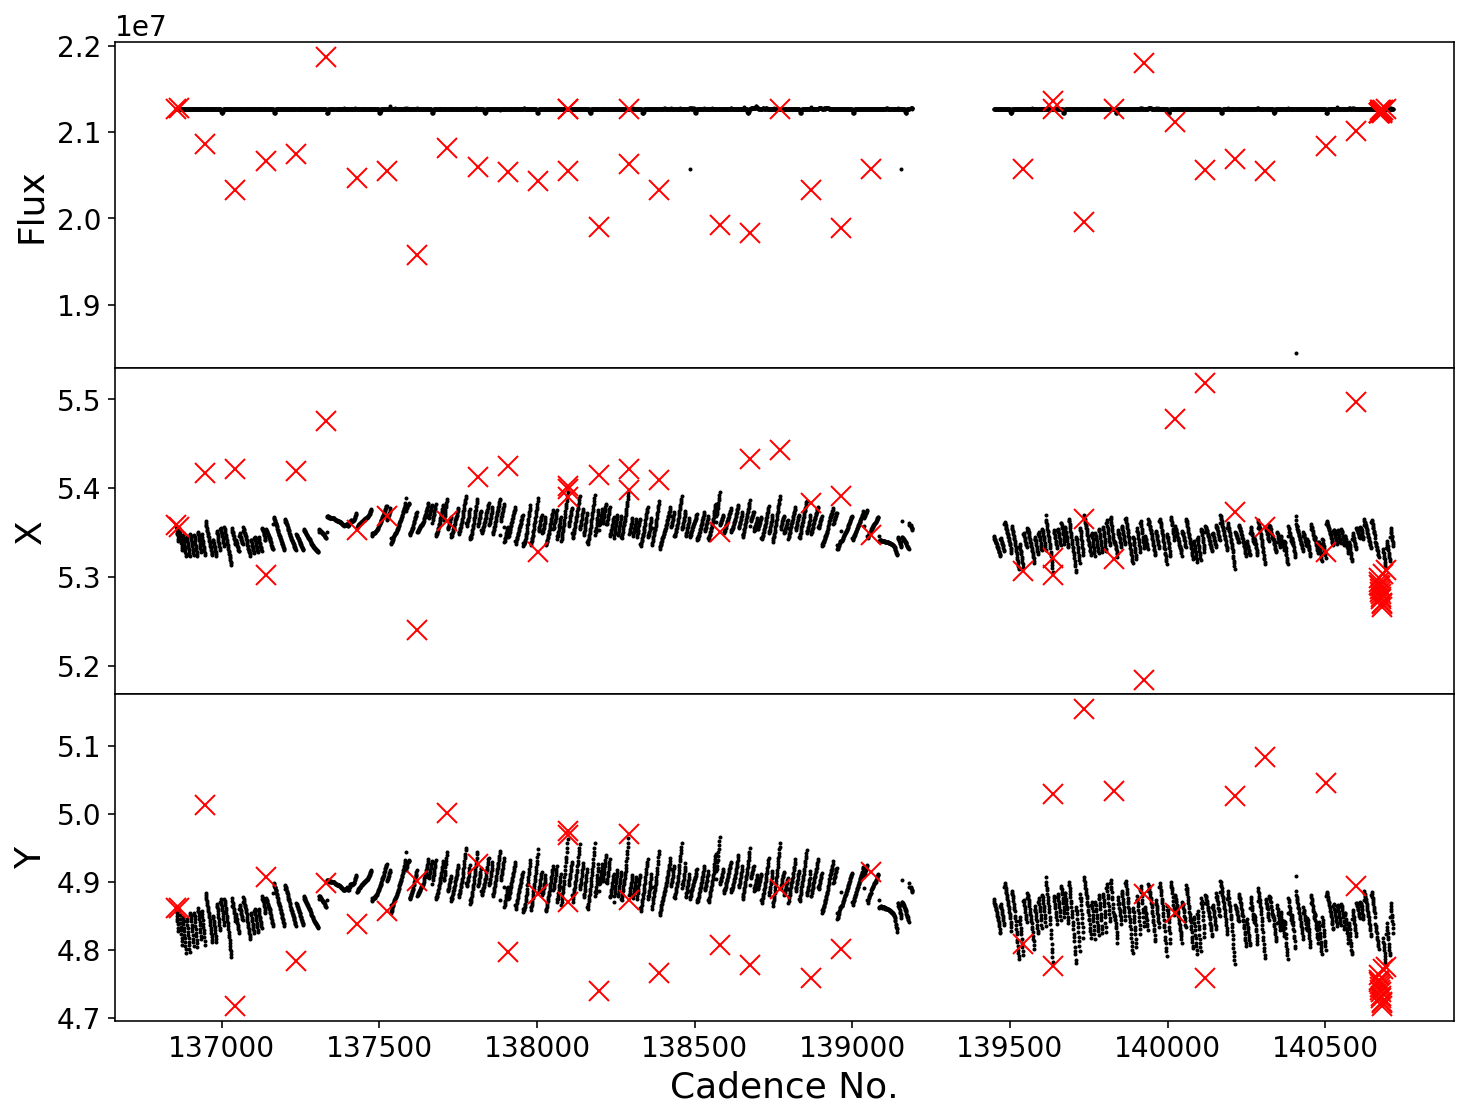

In [3]:
plot_outliers('k2_246375295-kadenza_llc.fits')

0.0144452
[-1  0  1  2  3  4]
[137044 137236 137332 137428 137524 137584 137620 137812 137908 138099
 138100 138196 138292 138388 138484 138580 138676 138772 138868 138964
 139060 139156 139542 139637 139638 139734 139830 140022 140118 140310
 140406 140502 140598 140670 140671 140672 140673 140674 140675 140676
 140677 140678 140679 140680 140681 140682 140692 140693]


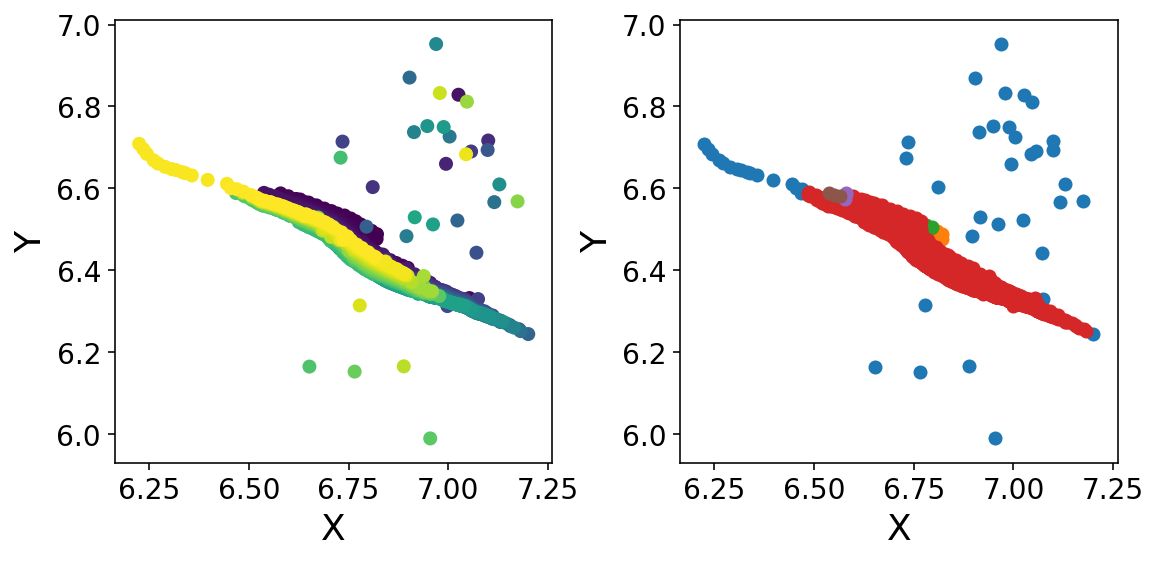

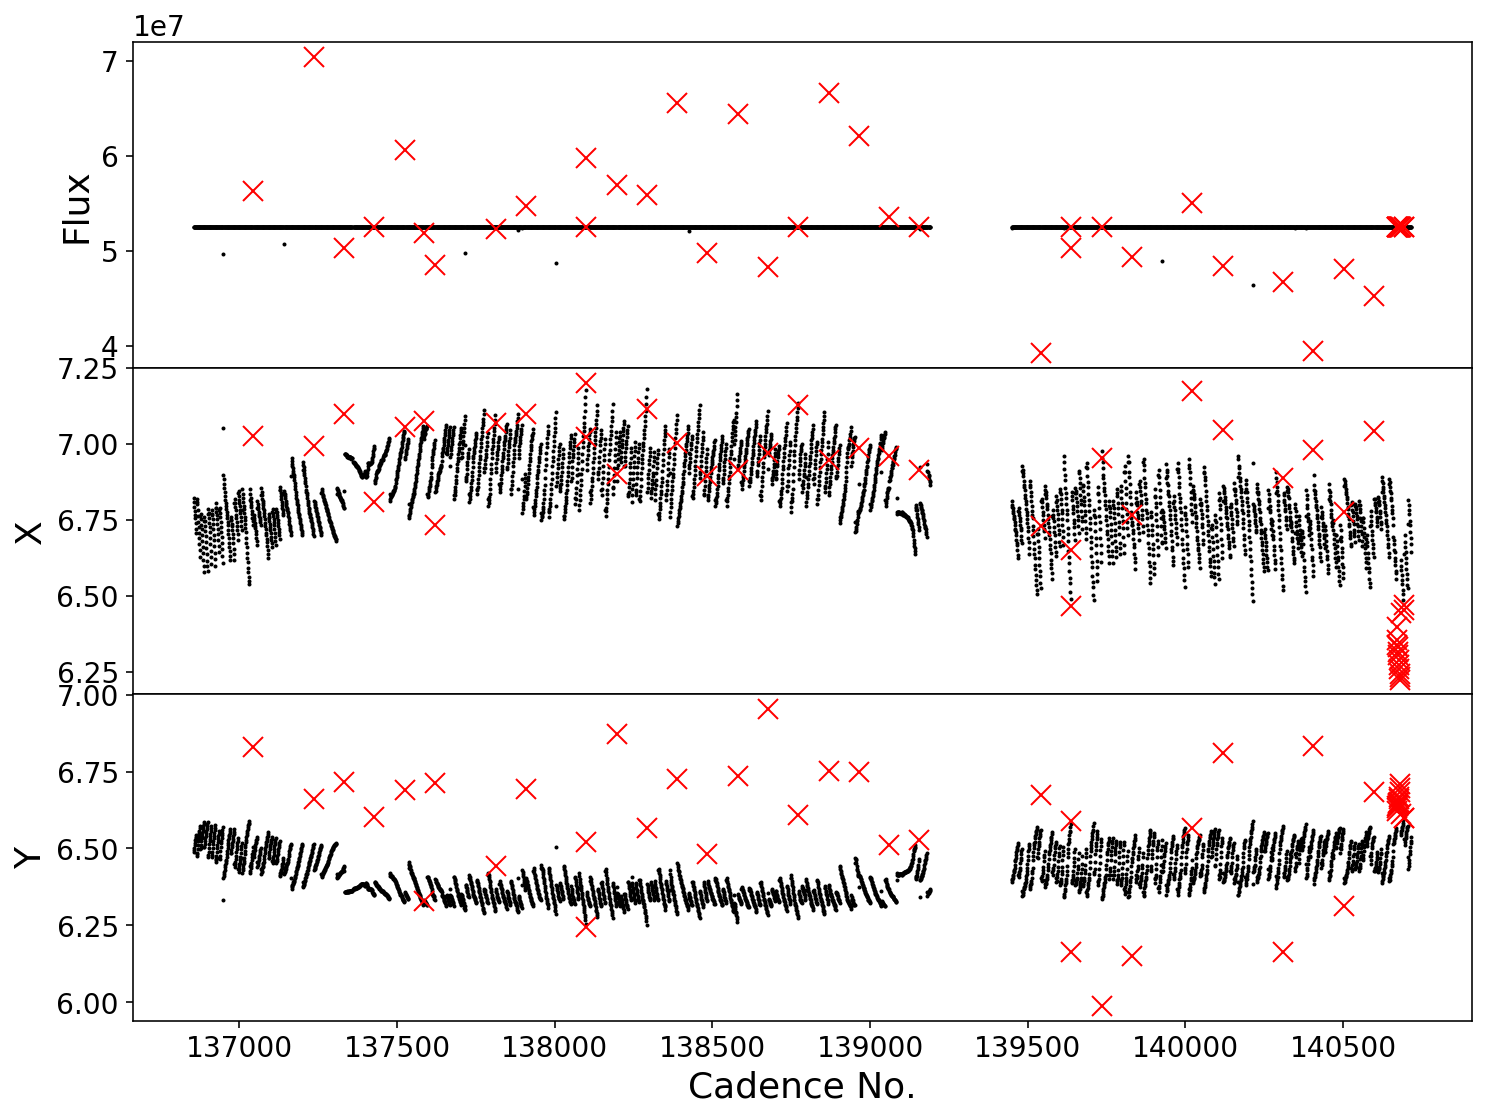

In [4]:
plot_outliers('k2_246512846-kadenza_llc.fits')